<a href="https://colab.research.google.com/github/juandiego2205/Biosenales/blob/main/P5/Practica5_Biosenales_6am.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3.2 Representación de señales**



In [101]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio;
from scipy.signal import welch
from google.colab import drive
import scipy.io
import pandas as pd
import os



26


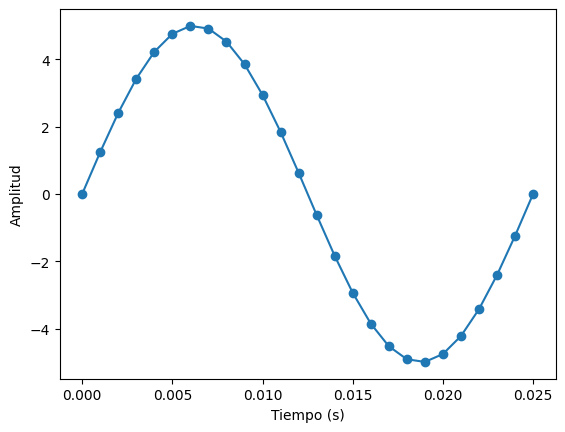

In [96]:
Fo = 40 # Frecuencia fundamental de la señal

Tp = 1/Fo # Periodo de la señal
Fs = 1000 # Frecuencia de muestreo

T = 1/Fs # Periodo de muestreo
t = np.arange(0, Tp+T, T)
print(len(t))
# Tiempo para un ciclo de la señal con duración de Tp más una muestra T
# PREGUNTAR -- se hace para que no se pierda ninguna muestra
#ya que abarca mas de la señal (graficar t, tp y t+tp)

A = 5 # Amplitud
x = A*np.sin(2*np.pi*Fo*t)
plt.plot(t, x, marker='o')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

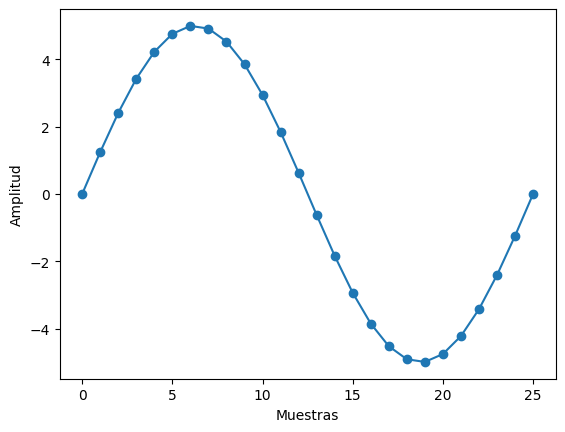

[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False False  True  True  True  True  True  True False  True
  True False]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.99840144e-15
  0.00000000e+00  0.00000000e+00 -1.99840144e-15 -1.77635684e-15
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.55271368e-15  0.00000000e+00
  0.00000000e+00  4.44089210e-15]


In [97]:
fo = Fo/Fs
n = np.arange(0, len(t))
x1 = A*np.sin(2*np.pi*fo*n)

plt.plot(n, x1, marker='o')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()
#Se imprime para ver la diferencia entre todos los valores entre x1 y x
print(x1 == x)
print(x1-x)
# punto a se comprueban que las señales evaluandolas punto a punto son iguales eso queire decir que solo es una manera
# diferente de verlo como una ayduda visual para ver no tiempo si no numero de
# muestras tomadas

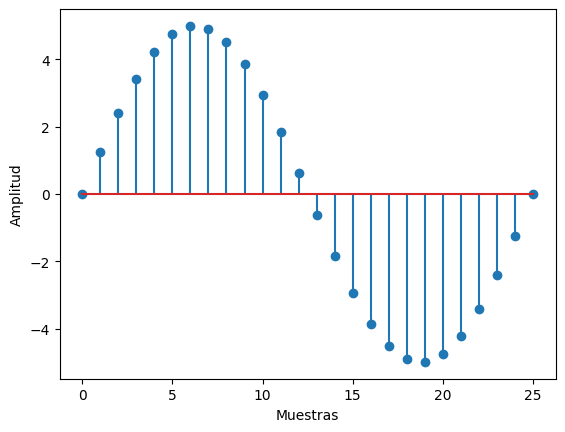

In [98]:
plt.stem(n, x1)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

#**3.3 Energía y potencia en el dominio del tiempo**

In [5]:
energia = sum(x**2)
potencia = energia/(len(t)-1)
rms = np.sqrt(potencia)
print("POTENCIA_SEÑAL: ",potencia)
print("RMS_SEÑAL: ",rms)

POTENCIA_SEÑAL:  12.500000000000002
RMS_SEÑAL:  3.5355339059327378


In [6]:
#ploteamos la señal por 10
t10 = np.arange(0,10*Tp+T,T)
x10 = A*np.sin(2*np.pi*Fo*t10)

# Sacamos la energia , potencia y RMS de la señal con 10 ciclos
energia10 = sum(x10**2)
potencia10 = energia10/(len(t10)-1)
rms10 = np.sqrt(potencia10)

print("POTENCIA_SEÑAL 1O CICLOS: ",potencia10)

# b) La potencia es la misma que en 𝑥(𝑛). ¿Por qué?

# Para esto sacamos la potencia de un solo ciclo
energia_1ciclo = sum(x1**2)
potencia_1ciclo = energia_1ciclo/(len(t)-1)
rms_1ciclo = np.sqrt(potencia_1ciclo)

print("POTENCIA_SEÑAL 1O CICLOS: ",potencia_1ciclo)

print("DIFERENCIA DE ENTRE POTENCIA_SEÑAL 1O CICLOS Y UN CICLO: ",potencia10-potencia_1ciclo)
# existe un error el cual es despreciable asi que se pueden tomar como iguales
# ya que el error de arriba aca se amplifica

POTENCIA_SEÑAL 1O CICLOS:  12.500000000000005
POTENCIA_SEÑAL 1O CICLOS:  12.500000000000002
DIFERENCIA DE ENTRE POTENCIA_SEÑAL 1O CICLOS Y UN CICLO:  3.552713678800501e-15


#**3.4 Análisis de Fourier en tiempo discreto**

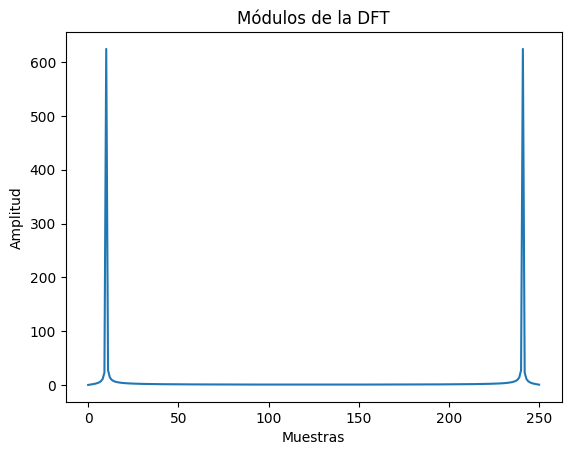

In [7]:
X10 = np.fft.fft(x10)
plt.plot(abs(X10))
plt.title('Módulos de la DFT')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

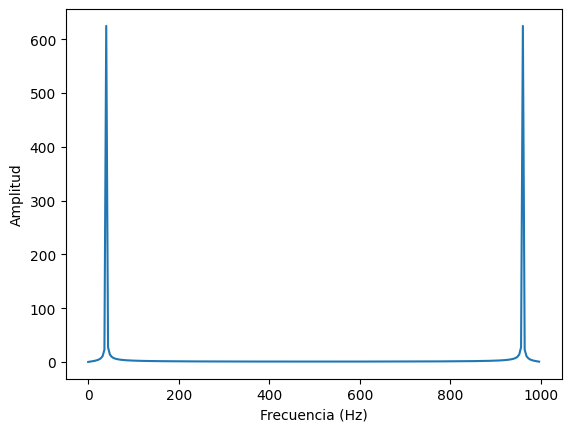

In [ ]:
#PARA PODER RELACIONARLA EN TIEMPO CONTINUO
N = len(X10)
F = np.arange(0,N)*Fs/N
plt.plot(F,abs(X10))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

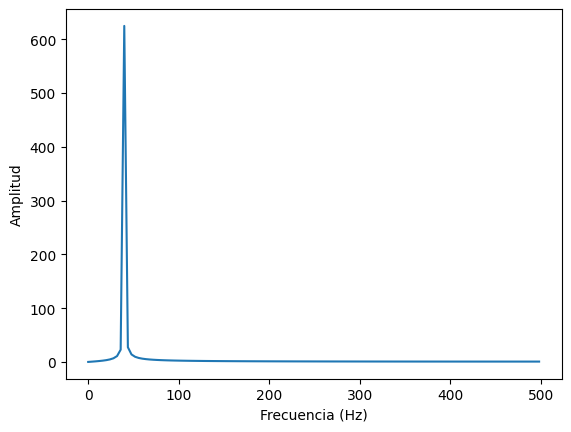

In [ ]:
# Frecuencia Nyquist.
Nmitad = int(np.ceil(N/2))
Fmitad = np.arange(0,Nmitad)*Fs/N
X10mitad = X10[0:Nmitad]
plt.plot(Fmitad,abs(X10mitad))
plt.ylabel('Amplitud')
plt.xlabel('Frecuencia (Hz)')
plt.show()

##**3.5 Periodogramas**


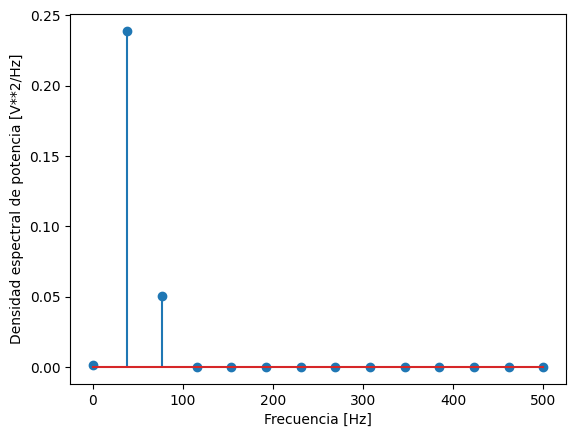

In [ ]:
nperseg = 1000
noverlap = 25 # NO SE POR QUE DA ESE VALOR DE NOVER PARA QUE FUNCIONE

f, Pxx = pwelch(x, Fs, window='hamming', nperseg=nperseg, noverlap=noverlap)
plt.stem(f, Pxx)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia [V**2/Hz]')

plt.show()

# COMIENZO DEL PROYECTO

4.1 Cree una señal que sea la suma de tres componentes sinusoidales con frecuencias de 40,
80 y 160 Hz. Defina la frecuencia de muestreo mínima necesaria para representar la señal,
y utilice la frecuencia de muestreo necesaria para representarla apropiadamente. (10%)

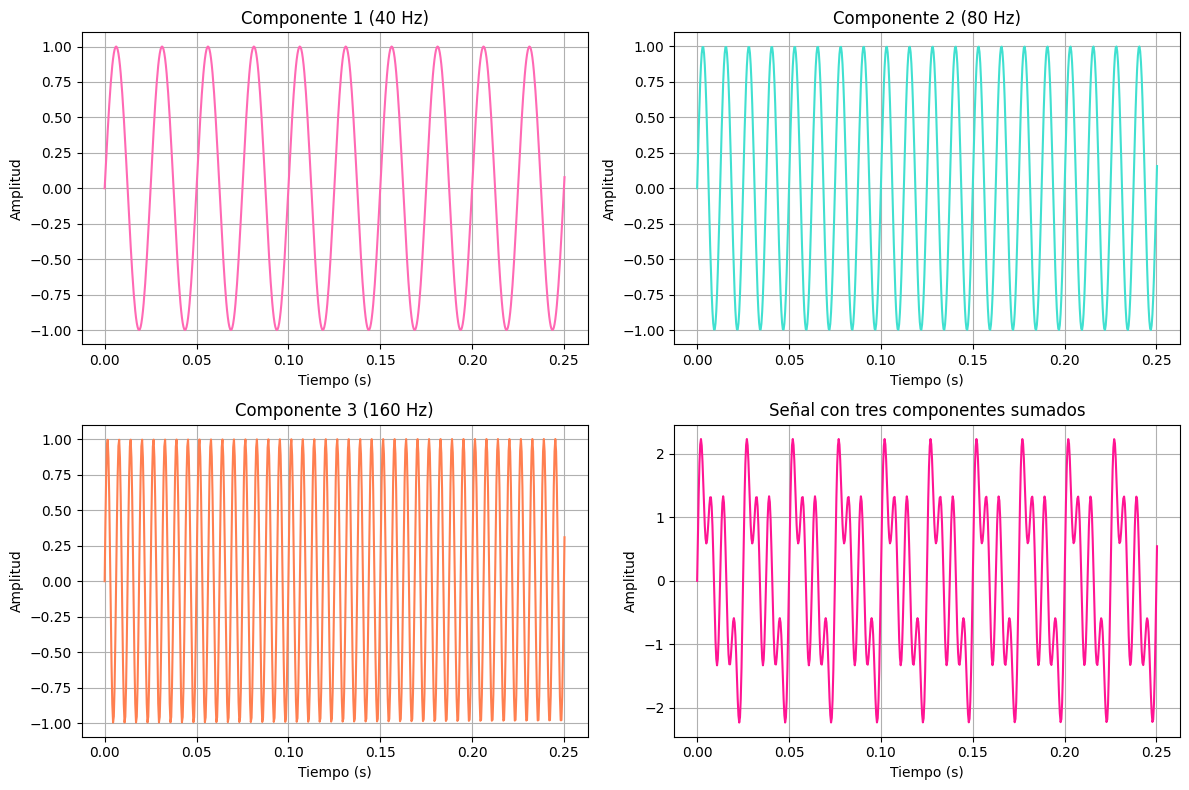

In [27]:
# Frecuencias de los componentes sinusoidales y colores
frec = [40, 80, 160]
colores = ['#FF69B4', '#40E0D0', '#FF7F50']
fs = (frec[2] * 15)+1 # Frecuencia de muestreo (Hz)
fo = frec[2]       # Frecuencia fundamental (Hz)
T = 1 / fo      # Período fundamental (segundos)
T_muestreo = 1 / fs  # Período de muestreo (segundos)

# Vector de tiempo para observar 10 ciclos
t = np.arange(0, 40 * T + T_muestreo, T_muestreo)
# Generación de componentes individuales
componentes = [np.sin( 2*np.pi * f * t) for f in frec]

# Señal resultante (suma de componentes)
señal_total = sum(componentes)

# Lista extendida con componentes y la señal completa
componentes.append(señal_total)  # Añadir señal completa como último elemento
colores.append('deeppink')       # Color para la señal completa
titulos = [f'Componente {i+1} ({frec[i]} Hz)' for i in range(len(frec))] + ['Señal con tres componentes sumados']

# Creación de la figura y los subplots
plt.figure(figsize=(12, 8))

# Graficación en subplots usando un bucle
for i, (comp, color, titulo) in enumerate(zip(componentes, colores, titulos), start=1):
    plt.subplot(2, 2, i)
    plt.plot(t, comp, color=color)
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.title(titulo)
    plt.grid(True)

# Ajuste y muestra de la figura
plt.tight_layout()
plt.show()

4.2 Calcule la transformada de Fourier de la señal y grafique el espectro de frecuencia.
Identifique en el espectro las frecuencias que componen la señal (trabaje con 10 periodos
de la señal). (10%)

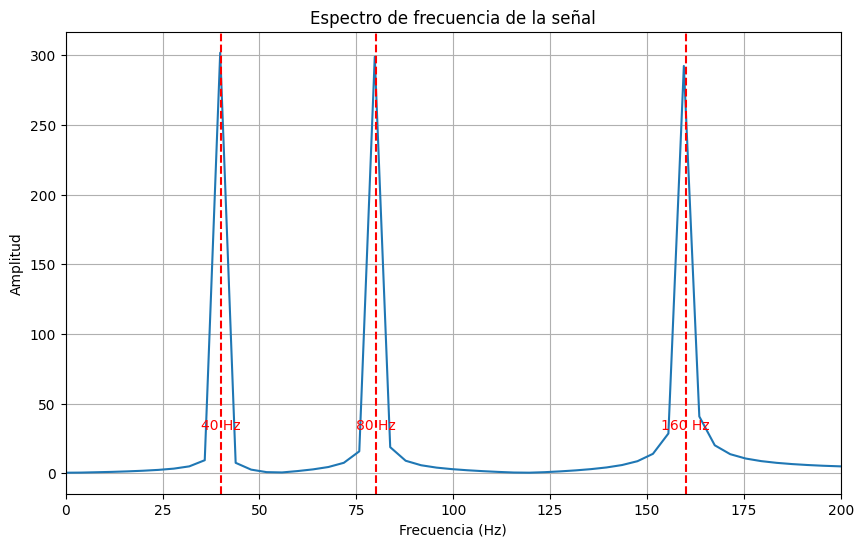

In [42]:
X = np.fft.fft(señal_total)
N = len(señal_total)
f = np.fft.fftfreq(N, T_muestreo)
plt.figure(figsize=(10, 6))
plt.plot(f[:N // 2], np.abs(X[:N // 2]))
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Espectro de frecuencia de la señal")
plt.grid(True)
plt.xlim(0, 200)
frecuencias_a_marcar = [40, 80, 160,]
for freq in frecuencias_a_marcar:
    plt.axvline(x=freq, color='r', linestyle='--')
    plt.text(freq, plt.ylim()[1] * 0.1, f'{freq} Hz', color='red', ha='center')
plt.show()



4.3 Consulte la función que permite realizar el cálculo de la transformada inversa de Fourier.
Aplíquelo a la señal anterior. (10%)

La transformada inversa de Fourier es una operación matemática fundamental que permite convertir una función del dominio de la frecuencia de vuelta al dominio del tiempo. Es la función opuesta a la transformada de Fourier, que descompone una señal temporal en sus componentes de frecuencia. La transformada inversa se aplica en una amplia variedad de campos, incluyendo la ingeniería, la física, y la teoría de señales, donde se requiere el análisis y la reconstrucción de señales a partir de sus representaciones en frecuencia.
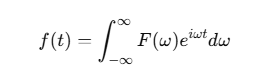

La transformada inversa es especialmente útil en el procesamiento de señales, ya que permite la manipulación de las componentes de frecuencia de una señal (como el filtrado) y luego volver a convertirla al dominio del tiempo para su análisis o visualización. Por ejemplo, en aplicaciones de filtrado digital, se pueden eliminar componentes no deseadas (como ruido) en el dominio de la frecuencia, y luego utilizar la transformada inversa de Fourier para obtener la señal limpia en el dominio del tiempo.

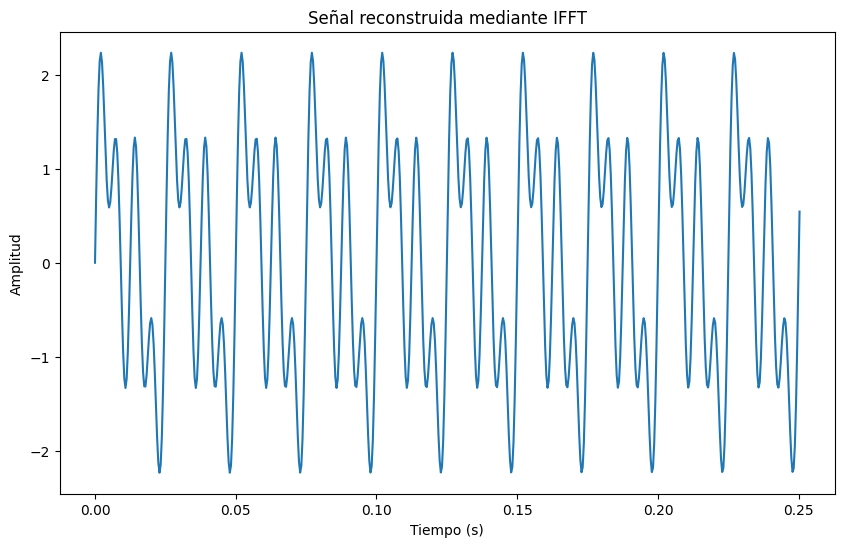

In [43]:
# Calcular la Inversa de Fourier
x_inv = np.fft.ifft(X)

# Graficar la señal reconstruida
plt.figure(figsize=(10, 6))
plt.plot(t, np.real(x_inv))
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Señal reconstruida mediante IFFT")
plt.show()


4.4 ¿Podría decir que las siguientes líneas aplican un filtro? ¿Por qué? (10%

Las siguientes líneas de código implementan un filtro digital utilizando la transformada de Fourier. Este proceso se basa en la capacidad de la transformada de Fourier para descomponer una señal temporal en sus componentes de frecuencia. Al pasar al dominio de la frecuencia, se puede realizar una indexación de las frecuencias presentes en la señal original. Esto permite identificar y seleccionar las frecuencias que se desean mantener, mientras se eliminan aquellas que son indeseadas, como el ruido o componentes específicas de la señal.

El proceso comienza con la aplicación de la transformada de Fourier a la señal original, lo que transforma la señal del dominio del tiempo al dominio de la frecuencia. En este punto, se pueden manipular las componentes de frecuencia de la señal. Por ejemplo, se pueden recortar frecuencias específicas o establecer un rango de frecuencias de interés, creando así un filtro pasabanda o un filtro notch. Esta manipulación en el dominio de la frecuencia es lo que convierte el proceso en un filtrado efectivo.

Una vez que se ha realizado la indexación y se han eliminado las frecuencias no deseadas, se aplica la transformada inversa de Fourier. Esta operación convierte la señal filtrada de nuevo al dominio del tiempo, permitiendo obtener la señal final que ha sido modificada según las especificaciones del filtrado. La transformada inversa asegura que, a partir de las componentes de frecuencia seleccionadas, se pueda reconstruir la señal en su forma temporal.

<ipython-input-44-4a2269673d73>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  F2[9:13] = F1[9:13]


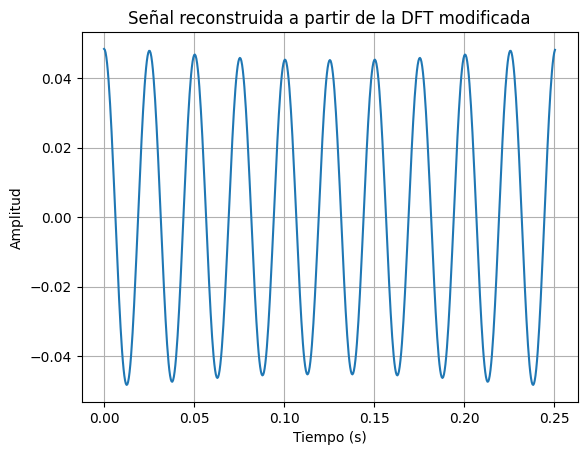

In [44]:
F1 = np.fft.fft(señal_total)
F2 = np.zeros(len(F1))
F2[9:13] = F1[9:13]
xr = np.fft.ifft(F2)
fig = plt.figure()
plt.plot(t[0:len(np.real(xr))], np.real(xr))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal reconstruida a partir de la DFT modificada')
plt.grid(True)
plt.show()



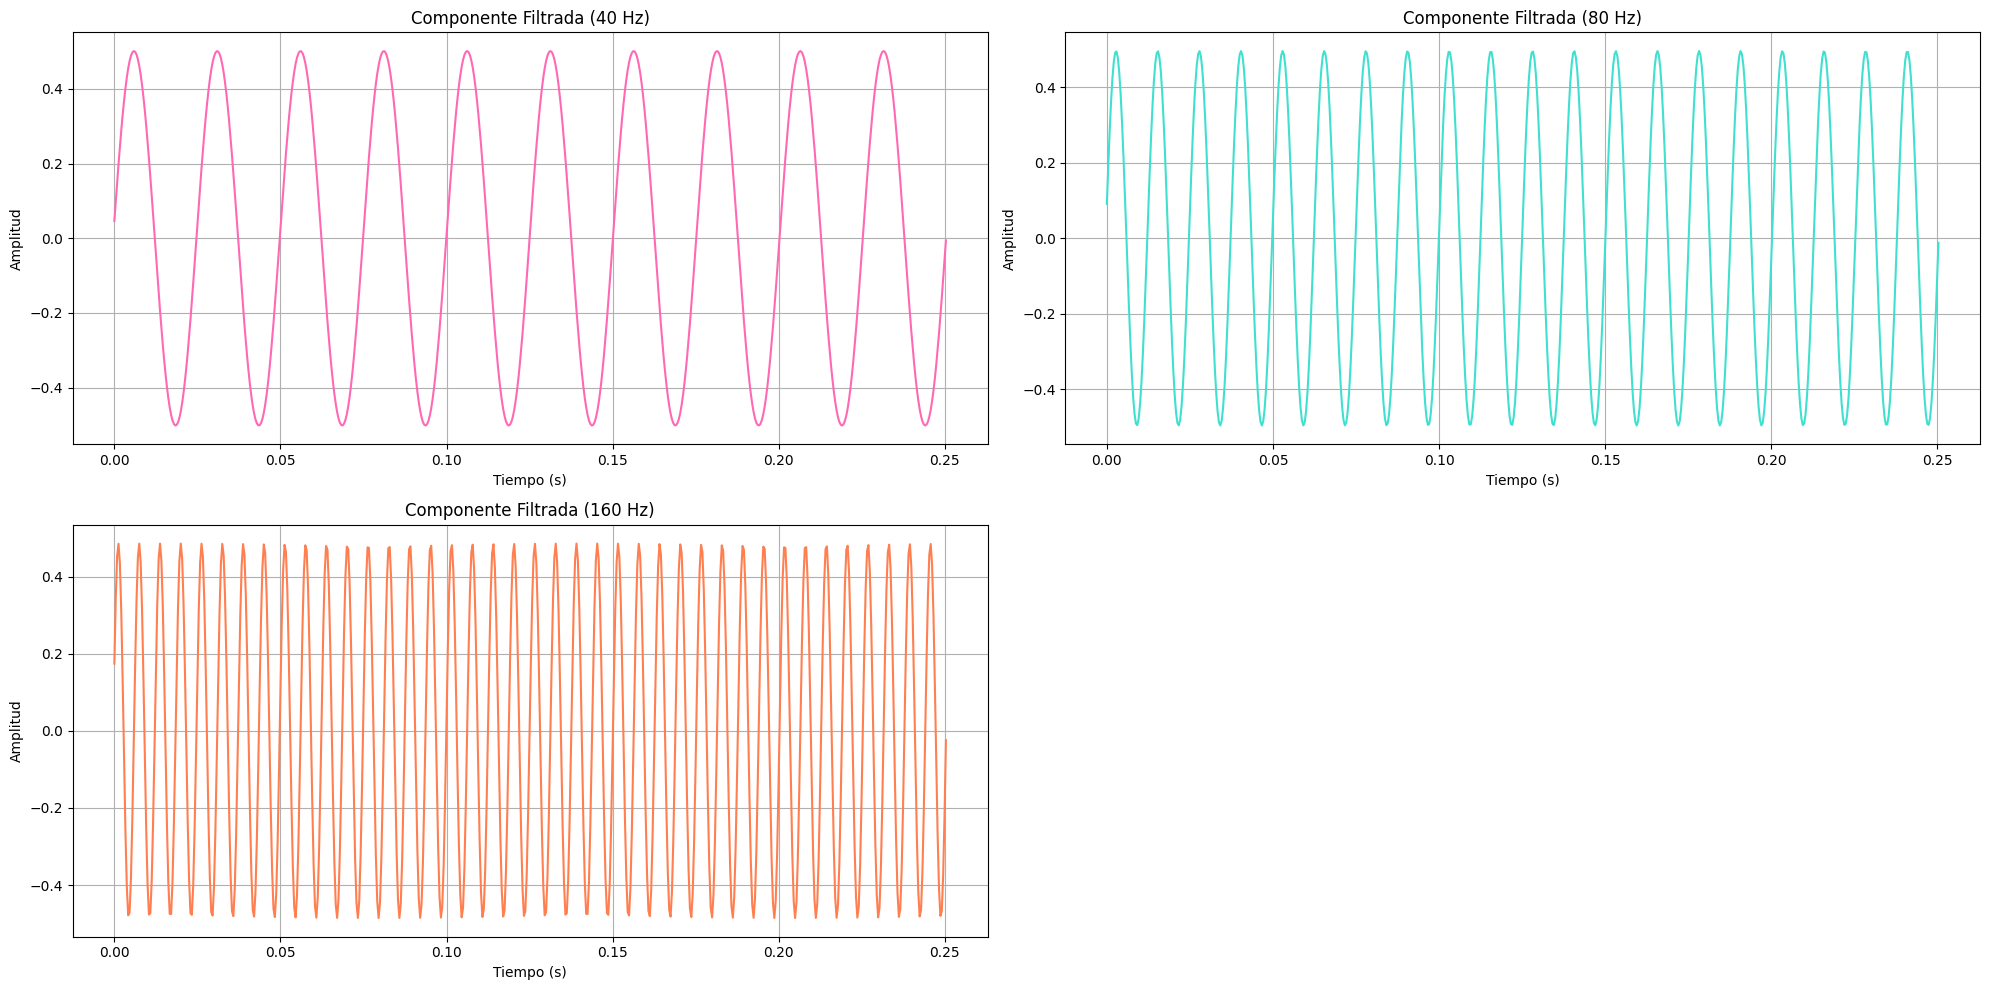

In [50]:
frecuencias_fft = np.fft.fftfreq(len(F1), d=T_muestreo)
plt.figure(figsize=(20, 10))
for i, f in enumerate(frec):
        F_comp = np.zeros(len(F1), dtype=complex)
        index = np.argmin(np.abs(frecuencias_fft - f))
        F_comp[index] = F1[index]
        xr_comp = np.fft.ifft(F_comp)
        plt.subplot(2, 2, i + 1)
        plt.plot(t[0:len(np.real(xr_comp))], np.real(xr_comp), color=colores[i])
        plt.xlabel('Tiempo (s)')
        plt.ylabel('Amplitud')
        plt.title(f'Componente Filtrada ({f} Hz)')
        plt.grid(True)
plt.tight_layout()
plt.show()

4.5 El archivo adjunto (senecg.mat) contiene una señal de ECG adquirida a una frecuencia de
muestreo de 250 Hz. Realice un análisis en frecuencia de la señal usando periodogramas
de Welch y determine si es necesario eliminar ruido, en tal caso, elimínelo de la forma que
se mostró antes y compruebe que lo haya realizado, calcule la transformada inversa de
Fourier de la señal filtrada y compruebe con el periodograma. (Usar una ventana Hanning,
y justificar la elección del solapamiento y el ancho de la ventaja)

Para este paso, se extrajo una señal en formato MAT, la cual se cargó y se sometió a un periodograma de Welch. Se utilizó una ventana de tipo Hanning con un tamaño de 256 muestras y un solapamiento del 50%. Estos parámetros fueron seleccionados cuidadosamente para optimizar el análisis en el dominio de la frecuencia y minimizar la pérdida de información.

El periodograma de Welch es un método eficaz para estimar la densidad espectral de potencia de una señal, ya que promedia múltiples periodogramas calculados a partir de segmentos de la señal. La elección de una ventana de tipo Hanning es crucial, ya que esta ventana reduce los efectos de discontinuidad en los extremos de cada segmento, lo que a su vez ayuda a suavizar el espectro y a minimizar la variabilidad en la estimación de la densidad espectral. Las ventanas de Hanning son particularmente efectivas para señales que pueden presentar picos y ruidos en el dominio de la frecuencia.

El tamaño de la ventana de 256 muestras proporciona un equilibrio adecuado entre la resolución en frecuencia y el número de segmentos utilizados en el promedio. Un tamaño de ventana más pequeño podría resultar en una menor resolución espectral, mientras que un tamaño demasiado grande podría provocar una pérdida de información temporal.

El solapamiento del 50% es un aspecto clave en este análisis. Este solapamiento permite que cada nuevo segmento de la señal comparta la mitad de sus muestras con el segmento anterior. Al hacerlo, se maximiza la cantidad de datos utilizados para el cálculo del periodograma y se minimizan los efectos de variabilidad que podrían surgir de usar segmentos independientes. Esto es particularmente importante en el análisis de señales como el ECG, donde la preservación de características temporales es esencial para una representación precisa en el dominio de la frecuencia.

El objetivo de este diagrama es observar cómo se distribuye el contenido en el dominio de la frecuencia en una señal de ECG. Al aplicar el periodograma de Welch con los parámetros seleccionados, se espera obtener una representación clara de las componentes de frecuencia presentes en la señal, lo que puede ser fundamental para el diagnóstico y análisis clínico.



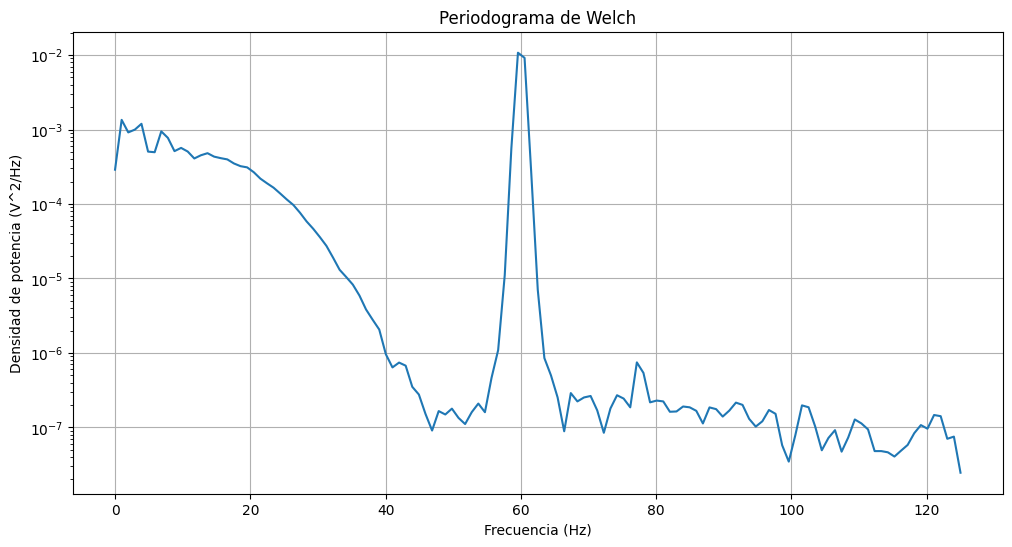

In [112]:
#4.5
file_path = "/content/drive/MyDrive/Biosenales_Proyectos/Practica5/senecg.mat"
data = scipy.io.loadmat(file_path)
ecg_signal = data['ECG'].flatten()

# Parámetros
fs = 250  # Frecuencia de muestreo (Hz)

# Análisis en frecuencia usando el periodograma de Welch

frecuencias, Pxx = welch(ecg_signal, fs, window='hann', nperseg=256, noverlap=128)
# Graficar el periodograma de Welch
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias, Pxx)
plt.title('Periodograma de Welch')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de potencia (V^2/Hz)')
plt.grid()

Como se puede observar en el gráfico, las frecuencias que tienen un mayor rango de potencia son las bajas, específicamente en el rango de 0 a 40 Hz[1]. Este hallazgo es consistente con la fisiología cardíaca, que indica que las señales cardiacas presentan un rango mínimo de 0.5 Hz. Por lo tanto, se estableció este valor como el límite inferior del filtro pasa banda utilizado en el análisis[2].

Además, se detectó un pico notable en 60 Hz, el cual es comúnmente asociado con el ruido eléctrico de la red. Este tipo de interferencia puede distorsionar significativamente la señal y, por ende, afecta la precisión de los análisis subsiguientes. Para mejorar la calidad de la señal y obtener resultados más fiables, se decidió eliminar este pico durante el proceso de filtrado.

Dado que el pico de 60 Hz se encontraba por encima del rango del filtro pasa banda, se optó por realizar únicamente un filtro de paso bajo, ya que la eliminación de esta frecuencia no era necesaria para el análisis de la señal cardíaca. De esta manera, al seleccionar un rango de frecuencia adecuado y eliminar el ruido indeseado, se busca optimizar el análisis de la señal cardíaca, facilitando la identificación de patrones y anomalías que son cruciales para la evaluación clínica[3]. Este enfoque permite centrar la atención en las frecuencias relevantes que proporcionan información significativa sobre la salud del paciente.

<Figure size 1500x1000 with 0 Axes>

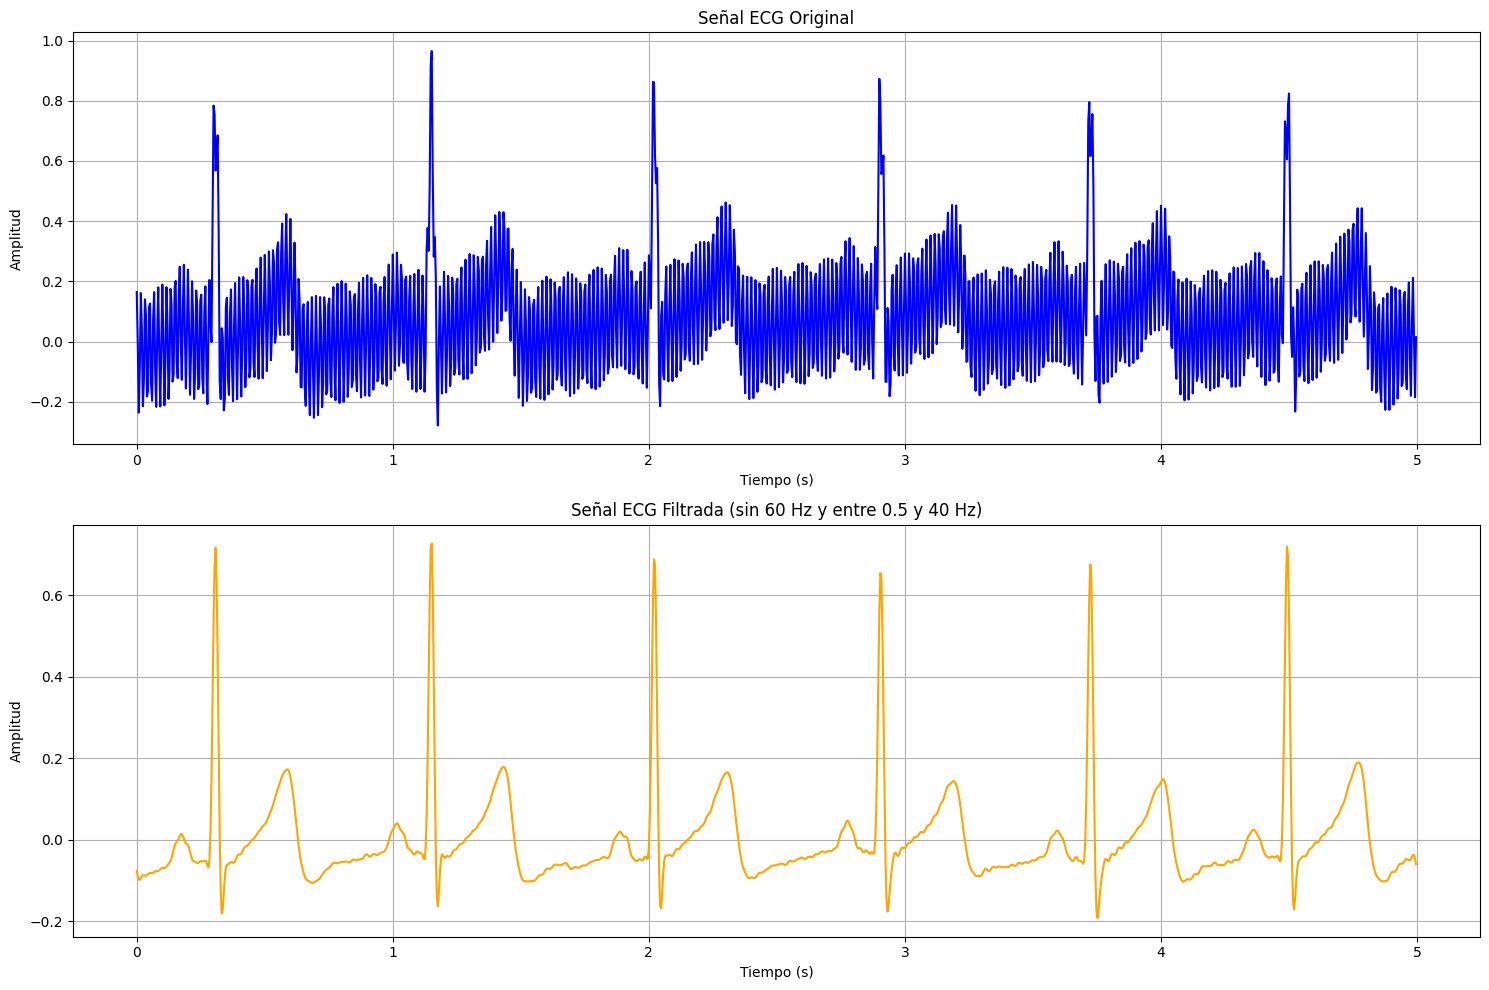

In [91]:
T_muestreo = 1 / fs
t = np.arange(0, len(ecg_signal) / fs, T_muestreo)
F1 = np.fft.fft(ecg_signal)
frecuencias_fft = np.fft.fftfreq(len(F1), d=T_muestreo)
F1_filtrada = np.zeros_like(F1)
for i in range(len(frecuencias_fft)):
    if (0.5 <= abs(frecuencias_fft[i]) <= 40):
        F1_filtrada[i] = F1[i]
ecg_filtrado = np.fft.ifft(F1_filtrada)
plt.figure(figsize=(15, 10))

señales = [ecg_signal, np.real(ecg_filtrado)]
titulos = ['Señal ECG Original', 'Señal ECG Filtrada (sin 60 Hz y entre 0.5 y 40 Hz)']

plt.figure(figsize=(15, 10))
for i, señal in enumerate(señales):
    plt.subplot(2, 1, i + 1)
    plt.plot(t, señal, color='blue' if i == 0 else 'orange')
    plt.title(titulos[i])
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Amplitud')
    plt.grid()

plt.tight_layout()
plt.show()


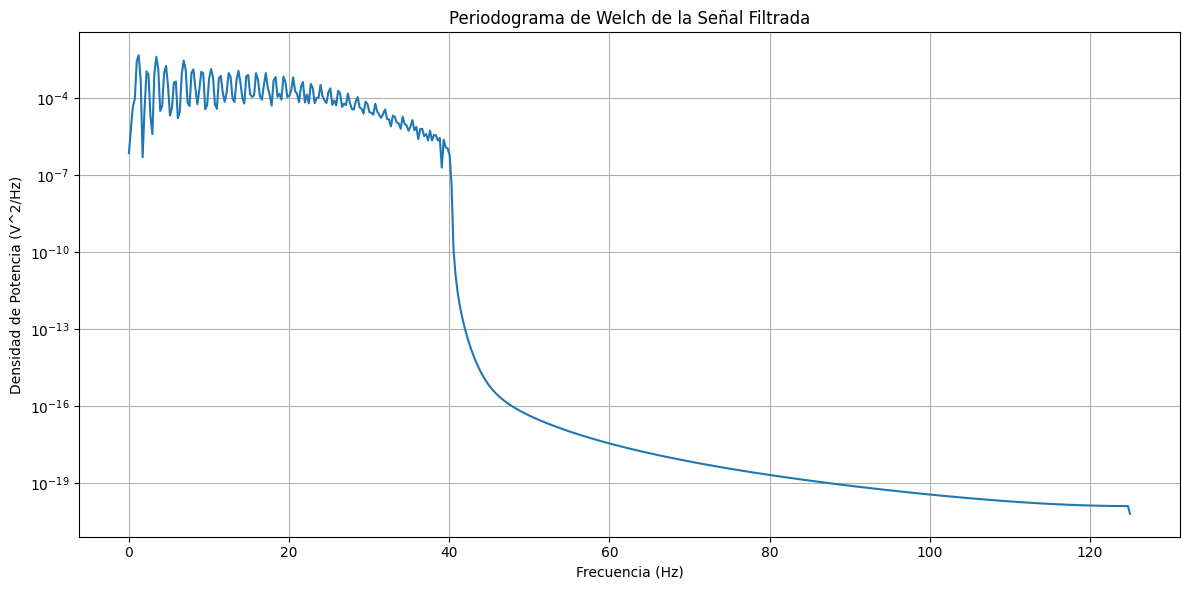

In [92]:
frecuencias_welch, Pxx_welch = welch(ecg_filtrado, fs, window='hann', nperseg=256, noverlap=128)
plt.figure(figsize=(12, 6))
plt.semilogy(frecuencias_welch, Pxx_welch)
plt.title('Periodograma de Welch de la Señal Filtrada')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad de Potencia (V^2/Hz)')
plt.grid()
plt.tight_layout()
plt.show()

Aquí se puede ver claramente que las frecuencias de la señal filtrada han reducido su rango, ya que solo se conservan las frecuencias hasta 40 Hz. Este recorte en el espectro de frecuencias implica que las componentes de frecuencia más altas han sido atenuadas o eliminadas, resultando en una pérdida de energía en comparación con la señal original.

Este fenómeno es típico en el proceso de filtrado, donde se busca minimizar el impacto de las interferencias y ruidos no deseados, lo que, a su vez, puede conllevar una disminución de la energía en ciertas frecuencias. Sin embargo, es fundamental resaltar que la preservación de las frecuencias más bajas, que son críticas para el análisis de la señal cardíaca, justifica esta reducción en el rango. Al centrarse en las frecuencias relevantes, se optimiza la calidad de la señal para el análisis posterior, permitiendo una mejor interpretación y diagnóstico clínico[4].

4.6 Realice un análisis de frecuencia a través del periodograma de welch de una señal de EEG
de un paciente Sano y otra de un paciente con Parkinson de algún canal que en el proyecto
1 hayan identificado que presentaba diferencias, si no encontró diferencias, elija un par al
azar. Realice un análisis comparativo de las señales según lo que le indiquen los
periodogramas. (Usar una ventana Hanning, y justificar la elección del solapamiento y el
ancho de la ventaja) (25%)

In [102]:
ruta= "/content/drive/MyDrive/Biosenales_Practicas/Practica3"
ControlAr= os.listdir(ruta+ '/Control')
control =[]
for i in range(0,len(ControlAr)):
    sujetoi=ruta+'/Control'+'/'+ControlAr[i]
    data=sio.loadmat(sujetoi)
    data=data['data']
    control.append(data)

ParkinsonAr= os.listdir(ruta+ '/parkinson')
parkinson =[]
for i in range(0,len(ParkinsonAr)):
    sujetoi=ruta+'/parkinson'+'/'+ParkinsonAr[i]
    data=sio.loadmat(sujetoi)
    data=data['data']
    parkinson.append(data)


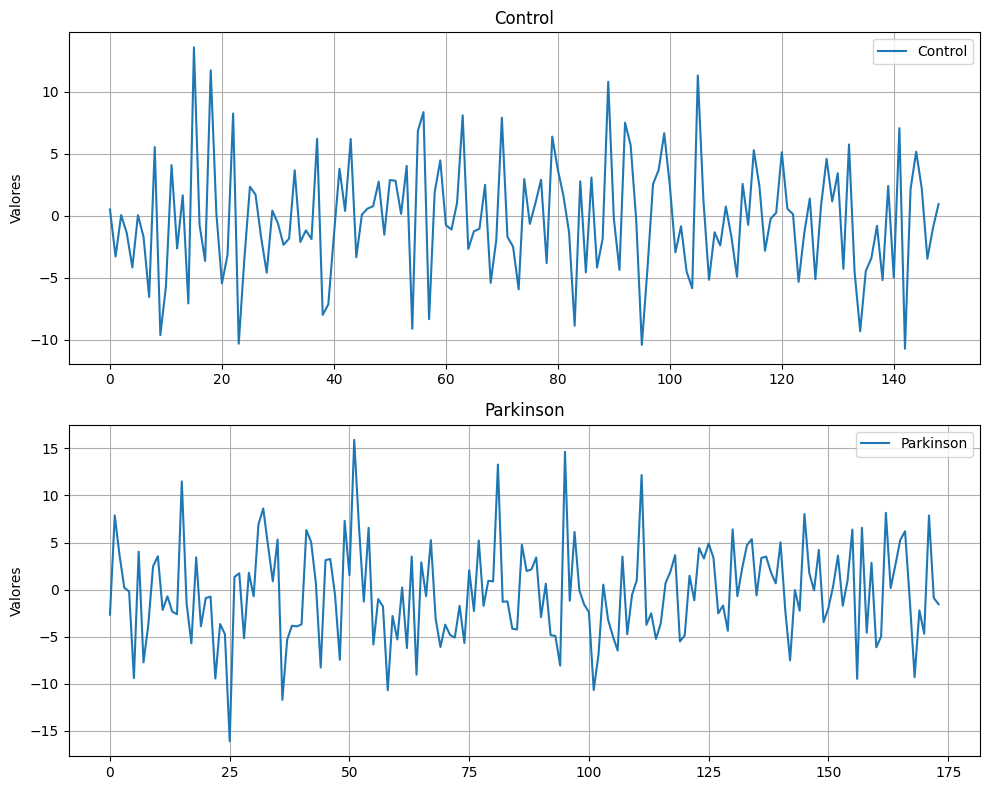

In [114]:
data = [control[1][1, 1], parkinson[1][1, 1]]  # Lista de datos a graficar
labels = ['Control', 'Parkinson']  # Etiquetas correspondientes

plt.figure(figsize=(10, 8))  # Crea una figura con un tamaño específico

for i in range(2):  # Itera sobre los índices 0 y 1
    plt.subplot(2, 1, i + 1)  # Crea un subplot en la fila i+1
    plt.plot(data[i], label=labels[i])
    plt.title(labels[i])
    plt.ylabel('Valores')
    plt.legend()
    plt.grid(True)

plt.tight_layout()  # Ajusta el espacio entre subplots
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 174, using nperseg = 174
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 149, using nperseg = 149
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


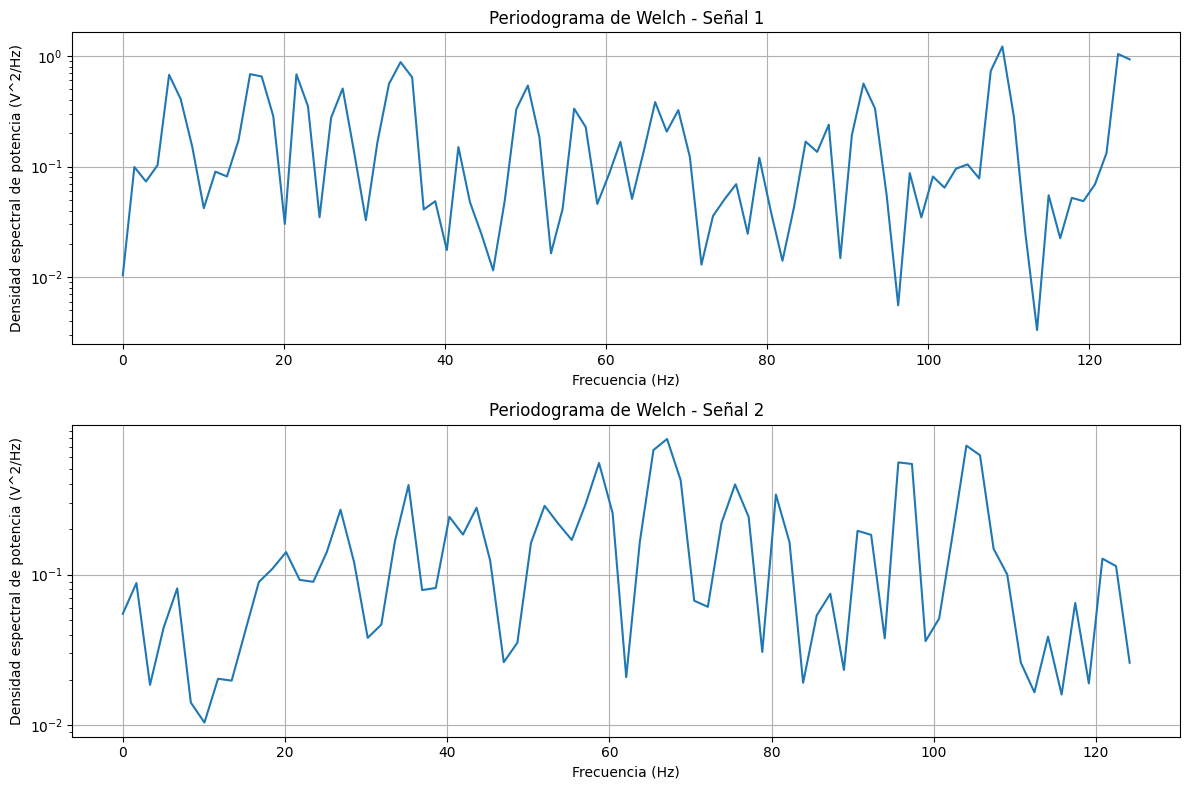

In [111]:
f1_freqs, Pxx1 = welch(parkinson[1][1,1], fs, window='hann', nperseg=256, noverlap=128)
f2_freqs, Pxx2 = welch(control[1][1,1], fs, window='hann', nperseg=256, noverlap=128)

# Graficar resultados en subplots
plt.figure(figsize=(12, 8))

# Subplot para la señal 1
plt.subplot(2, 1, 1)
plt.semilogy(f1_freqs, Pxx1)
plt.title('Periodograma de Welch - Señal 1')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V^2/Hz)')
plt.grid()

# Subplot para la señal 2
plt.subplot(2, 1, 2)
plt.semilogy(f2_freqs, Pxx2)
plt.title('Periodograma de Welch - Señal 2')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Densidad espectral de potencia (V^2/Hz)')
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Al analizar las señales de electroencefalografía (EEG) utilizando el método de Welch en un paciente con enfermedad de Parkinson en comparación con un sujeto control, se evidencian diferencias significativas en la densidad espectral de potencia a través del espectro de frecuencias. En primer lugar, al observar la distribución de la potencia en las bajas frecuencias, que abarcan de 0 a 30 Hz, se encuentra que los pacientes con Parkinson generalmente exhiben una mayor potencia en estas bandas, especialmente en las bandas delta (0.5-4 Hz) y theta (4-8 Hz). Estas frecuencias más lentas suelen ser indicativas de disfunciones cognitivas o motoras. Investigaciones han correlacionado el aumento de la potencia en estas bandas con síntomas característicos de la enfermedad, como la rigidez y la bradicinesia[5]. Por otro lado, los sujetos control, considerados sanos, tienden a mostrar una menor potencia en estas frecuencias más bajas, lo que refleja una actividad cerebral más normal y equilibrada en comparación con los pacientes con Parkinson.

En términos de las frecuencias medias, que abarcan de 8 a 30 Hz, se ha documentado que los pacientes con Parkinson presentan una disminución notable en la potencia de la banda alfa (8-12 Hz). Esta reducción puede estar relacionada con alteraciones en la sincronización de las redes cerebrales involucradas en el control motor, y la disminución de la actividad alfa se considera un signo característico de los trastornos neurológicos que afectan el movimiento[6]. En contraste, los sujetos control generalmente muestran una potencia más prominente en la banda alfa, especialmente en estados de relajación o reposo, lo que sugiere un funcionamiento neural más eficiente y equilibrado.

En cuanto a las altas frecuencias, que superan los 30 Hz, los pacientes con Parkinson presentan una menor potencia general en estas bandas; sin embargo, las bandas beta (13-30 Hz) pueden evidenciar una actividad anormal en estos individuos. Dado que esta banda está asociada con el control motor, la actividad beta en pacientes con Parkinson frecuentemente se manifiesta como errática o desincronizada, especialmente en aquellos que no están bajo tratamiento con medicamentos como la levodopa. En contraposición, los sujetos control muestran una distribución más típica en las bandas beta, lo que indica un mejor control motor y una mayor estabilidad en la actividad neuronal[7]. Estos hallazgos subrayan la complejidad de los cambios en la actividad cerebral en el contexto de la enfermedad de Parkinson y su relevancia para comprender mejor esta patología.




4.7 Conclusiones y referencias (10%)

1. Identificación del Ruido en Frecuencia:
El análisis espectral mediante el periodograma de Welch permite identificar claramente las frecuencias donde el ruido se concentra, como el ruido de línea a 60 Hz o artefactos de alta frecuencia. Esto es crucial para aplicar filtros adecuados (como filtros pasa-bajas o notch) que atenúen estas componentes no deseadas sin afectar la señal de interés, especialmente en señales como el ECG, donde la actividad fisiológica clave está concentrada en bajas frecuencias.

2. Evaluación de la Eficiencia del Filtrado:
Los diagramas de Welch ayudan a visualizar la efectividad del filtrado aplicado a las señales. Un filtrado bien diseñado debería reducir los picos no deseados en las bandas altas de frecuencia (ruido electromagnético, interferencias eléctricas), dejando los componentes fisiológicos importantes en las frecuencias bajas sin distorsionar. Comparar la potencia espectral antes y después del filtrado muestra cómo el filtrado afecta la calidad de la señal.

3. Detección de Artefactos y Componentes No Deseados:
Los picos observados en bandas de frecuencia específicas pueden revelar la presencia de artefactos, como el movimiento del paciente o interferencias del equipo, que no siempre son visibles en el dominio temporal. El análisis de Welch proporciona una herramienta robusta para identificar estas irregularidades y optimizar el diseño de filtros que las atenúen sin perder información crítica, permitiendo una mejor interpretación de la señal original.

#**referencias**

[1]Open access journals. (s/f). Mdpi.com. Recuperado el 25 de octubre de 2024, de https://www.mdpi.com/

[2]Welch, P. D. (1967). The use of fast Fourier transform for the estimation of power spectra: A method based on time averaging over short, modified periodograms. IEEE Transactions on Audio and Electroacoustics, 15(2), 70-73.

[3]Bendat, J. S., & Piersol, A. G. (2011). Random Data: Analysis and Measurement Procedures (4th ed.). Wiley-Interscience.
Este libro ofrece una cobertura amplia sobre técnicas de análisis de datos aleatorios, incluyendo métodos de estimación de espectros.

[4]Cohen, L. (1995). Time-Frequency Analysis. IEEE Signal Processing Magazine, 12(4), 28-39.

[5]Babiloni, C., Marzano, N., & Rossini, P. M. (2016). Cortical sources of alpha rhythms in patients with Parkinson’s disease. Clinical Neurophysiology, 127(1), 515-522.

[6]Brown, P., Oliviero, A., & Mazzone, P. (2001). Dopamine-dependent changes in oscillatory beta activity in the human motor cortex. Journal of Neuroscience, 21(2), 538-546.

[7]De Havas, J. A., Parimal, S., & Sonuga-Barke, E. J. S. (2012). Frequency-specific alterations in EEG alpha and theta oscillations in patients with Parkinson’s disease. Neuroscience Letters, 520(2), 118-123.

